In [1]:
import ROOT
import pathlib


directory = pathlib.Path("../events/MG3")
f = ROOT.TFile(str(directory / "TTree" / "fourTag_picoAOD.root"))
# f.ls()
t = f.Get("Events")
t.Print()

Welcome to JupyROOT 6.30/04
******************************************************************************
*Tree    :Events    :                                                        *
*Entries :   220151 : Total =        47561858 bytes  File  Size =   24245187 *
*        :          : Tree compression factor =   1.96                       *
******************************************************************************
*Br    0 :nJet      : nJet/I                                                 *
*Entries :   220151 : Total  Size=     881158 bytes  File Size  =       4377 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression= 201.21     *
*............................................................................*
*Br    1 :Jet_pt    : Jet_pt/F                                               *
*Entries :   220151 : Total  Size=    4403673 bytes  File Size  =    3348334 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.32     *
*.......................

In [2]:
t.GetEntry(0)
t.Jet_mass[3]

0.0

In [3]:
import pandas as pd
import numpy as np

data = {
    "Jet0_pt": [],
    "Jet1_pt": [],
    "Jet2_pt": [],
    "Jet3_pt": [],
    "Jet0_eta": [],
    "Jet1_eta": [],
    "Jet2_eta": [],
    "Jet3_eta": [],
    "Jet0_phi": [],
    "Jet1_phi": [],
    "Jet2_phi": [],
    "Jet3_phi": [],
    "Jet0_m": [],
    "Jet1_m": [],
    "Jet2_m": [],
    "Jet3_m": [],
    "m01": [],
    "m23": [],
    "m02": [],
    "m13": [],
    "m03": [],
    "m12": [],
}
for idx in range(10000):
    t.GetEntry(idx)
    data["Jet0_pt"].append(t.Jet_pt[0])
    data["Jet1_pt"].append(t.Jet_pt[1])
    data["Jet2_pt"].append(t.Jet_pt[2])
    data["Jet3_pt"].append(t.Jet_pt[3])
    data["Jet0_eta"].append(t.Jet_eta[0])
    data["Jet1_eta"].append(t.Jet_eta[1])
    data["Jet2_eta"].append(t.Jet_eta[2])
    data["Jet3_eta"].append(t.Jet_eta[3])
    data["Jet0_phi"].append(t.Jet_phi[0])
    data["Jet1_phi"].append(t.Jet_phi[1])
    data["Jet2_phi"].append(t.Jet_phi[2])
    data["Jet3_phi"].append(t.Jet_phi[3])
    data["Jet0_m"].append(t.Jet_mass[0])
    data["Jet1_m"].append(t.Jet_mass[1])
    data["Jet2_m"].append(t.Jet_mass[2])
    data["Jet3_m"].append(t.Jet_mass[3])

    jets = [
                ROOT.TLorentzVector(),
                ROOT.TLorentzVector(),
                ROOT.TLorentzVector(),
                ROOT.TLorentzVector(),
            ]
    for i in range(4):
        jets[i].SetPtEtaPhiM(
            t.Jet_pt[i], t.Jet_eta[i], t.Jet_phi[i], t.Jet_mass[i]
        )

    data["m01"].append((jets[0] + jets[1]).M())
    data["m23"].append((jets[2] + jets[3]).M())
    data["m02"].append((jets[0] + jets[2]).M())
    data["m13"].append((jets[1] + jets[3]).M())
    data["m03"].append((jets[0] + jets[3]).M())
    data["m12"].append((jets[1] + jets[2]).M())
    
df = pd.DataFrame(data)

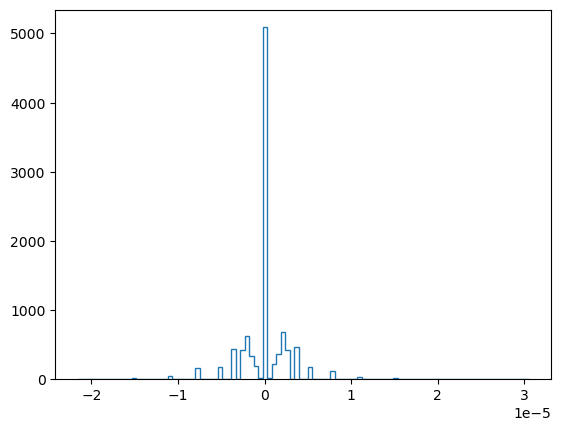

In [13]:
import matplotlib.pyplot as plt
plt.hist(df["Jet0_m"], bins=100, histtype="step")
plt.show()

In [7]:
import torch
import pathlib
import numpy as np
import pandas as pd

seed_ = 42

dim = 16
directory = pathlib.Path("../events/MG3")

df_3b = pd.read_hdf(directory / "dataframes" / "bbbj.h5")
df_bg4b = pd.read_hdf(directory / "dataframes" / "bbbb_large.h5")
df_hh4b = pd.read_hdf(directory / "dataframes" / "HH4b.h5")

df_3b["signal"] = False
df_bg4b["signal"] = False
df_hh4b["signal"] = True

print("3b-jet events: ", len(df_3b))
print("4b-jet events: ", len(df_bg4b))
print("HH4b-jet events: ", len(df_hh4b))

# shuffle the data
df_3b = df_3b.sample(frac=1, random_state=seed_).reset_index(drop=True)
df_bg4b = df_bg4b.sample(frac=1, random_state=seed_).reset_index(drop=True)
df_hh4b = df_hh4b.sample(frac=1, random_state=seed_).reset_index(drop=True)

3b-jet events:  275508
4b-jet events:  382108
HH4b-jet events:  28656


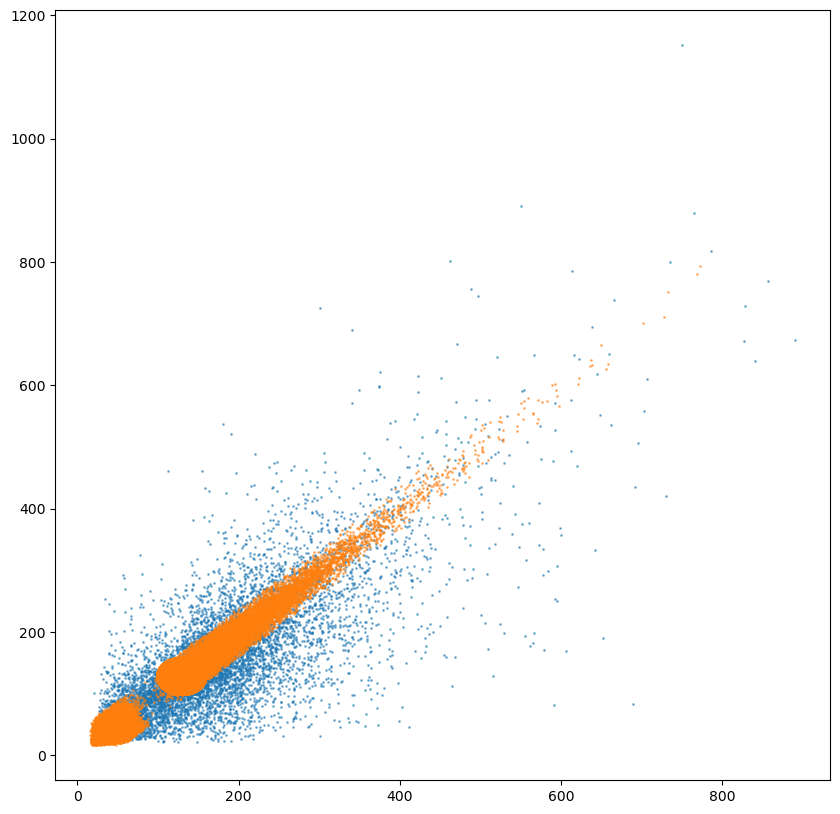

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

m_diff = np.stack(
    [df["m01"] - df["m23"],
     df["m02"] - df["m13"], 
     df["m03"] - df["m12"],
    ], axis=1)
m_diff = np.abs(m_diff)
m_diff_argmin = np.argmin(m_diff, axis=1)
m1 = np.where(m_diff_argmin == 0, df["m01"],
                np.where(m_diff_argmin == 1, df["m02"], df["m03"]))
m2 = np.where(m_diff_argmin == 0, df["m23"],
                np.where(m_diff_argmin == 1, df["m13"], df["m12"]))

ax.plot(m1, m2, "o", alpha=0.5, markersize=1)


m_diff = np.stack(
    [df_bg4b["m01"] - df_bg4b["m23"],
     df_bg4b["m02"] - df_bg4b["m13"], 
     df_bg4b["m03"] - df_bg4b["m12"],
    ], axis=1)
m_diff = np.abs(m_diff)
m_diff_argmin = np.argmin(m_diff, axis=1)
m1 = np.where(m_diff_argmin == 0, df_bg4b["m01"],
                np.where(m_diff_argmin == 1, df_bg4b["m02"], df_bg4b["m03"]))
m2 = np.where(m_diff_argmin == 0, df_bg4b["m23"],
                np.where(m_diff_argmin == 1, df_bg4b["m13"], df_bg4b["m12"]))
ax.plot(m1, m2, "o", alpha=0.5, markersize=1)

plt.show()
plt.close()


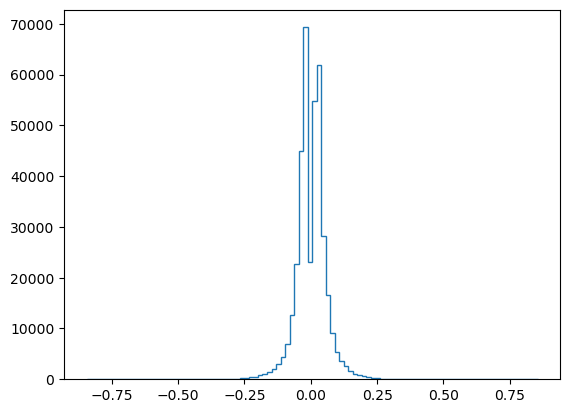

In [12]:
plt.hist(df_bg4b["canJet0_m"], bins=100, histtype="step")
plt.show()
plt.close()

In [14]:
seed_ = 42

dim = 16
directory = pathlib.Path("../events/MG3")

df_3b = pd.read_hdf(directory / "dataframes" / "threeTag_picoAOD.h5")
df_bg4b = pd.read_hdf(directory / "dataframes" / "fourTag_10x_picoAOD.h5")
df_hh4b = pd.read_hdf(directory / "dataframes" / "HH4b_picoAOD.h5")

df_3b["signal"] = False
df_bg4b["signal"] = False
df_hh4b["signal"] = True

print("3b-jet events: ", len(df_3b))
print("4b-jet events: ", len(df_bg4b))
print("HH4b-jet events: ", len(df_hh4b))

# shuffle the data
df_3b = df_3b.sample(frac=1, random_state=seed_).reset_index(drop=True)
df_bg4b = df_bg4b.sample(frac=1, random_state=seed_).reset_index(drop=True)
df_hh4b = df_hh4b.sample(frac=1, random_state=seed_).reset_index(drop=True)

3b-jet events:  2013103
4b-jet events:  2202261
HH4b-jet events:  30856


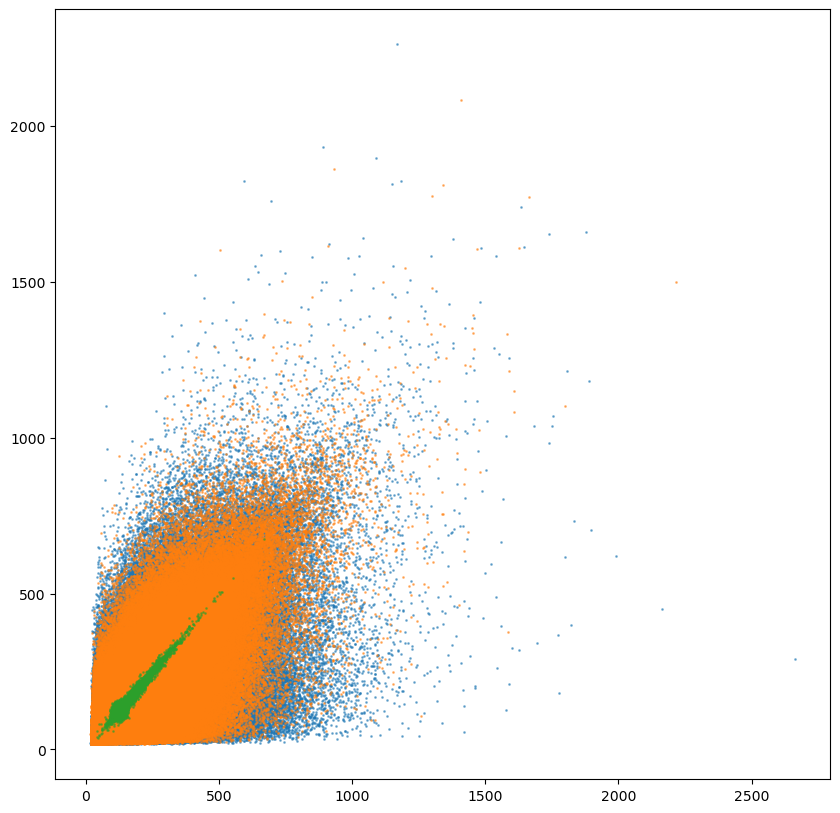

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
for df in [df_3b, df_bg4b, df_hh4b]:
    m_diff = np.stack(
        [df["m01"] - df["m23"],
        df["m02"] - df["m13"], 
        df["m03"] - df["m12"],
        ], axis=1)
    m_diff = np.abs(m_diff)
    m_diff_argmin = np.argmin(m_diff, axis=1)
    m1 = np.where(m_diff_argmin == 0, df["m01"],
                    np.where(m_diff_argmin == 1, df["m02"], df["m03"]))
    m2 = np.where(m_diff_argmin == 0, df["m23"],
                    np.where(m_diff_argmin == 1, df["m13"], df["m12"]))
    ax.plot(m1, m2, "o", alpha=0.5, markersize=1)

plt.show()
plt.close()


3b-jet events:  275508
4b-jet events:  382108
HH4b-jet events:  28656


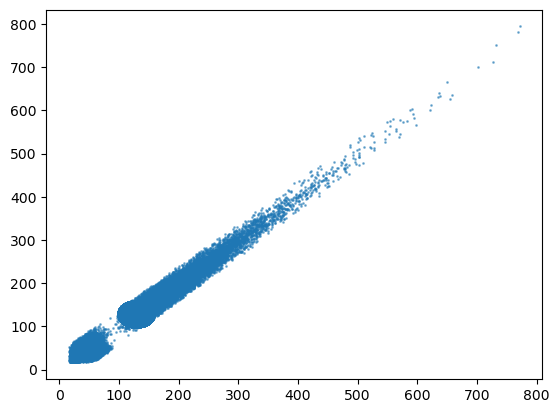

In [4]:
print(df_3b["SR"].mean())
print(df_3b["SB"].mean())
print(df_3b["CR"].mean())

0.5488878725844621
0.0
0.45111212741553786
